In [1]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M3 Max

systemMemory: 36.00 GB
maxCacheSize: 13.50 GB

METAL


2024-01-23 13:40:51.616791: W pjrt_plugin/src/mps_client.cc:563] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!


In [1]:
import numpy as np

x = np.random.rand(100,1)
A = np.random.rand(1, 10)
out = np.random.rand(10, 1)

print(x.shape)
x = x @ A
print(x.shape)
x = x @ out
print(x.shape)

(100, 1)
(100, 10)
(100, 1)


Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!
2024-01-24 06:59:09.243384: W pjrt_plugin/src/mps_client.cc:563] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!


Metal device set to: Apple M3 Max

systemMemory: 36.00 GB
maxCacheSize: 13.50 GB

(500,) (500,)


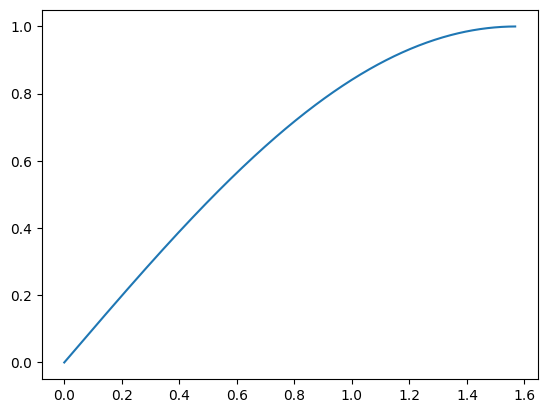

x.shape =  (500, 1)
y.shape =  (500, 1)


In [2]:
import jax.numpy as jnp
import math
import matplotlib.pyplot as plt

# print(math.pi)
x = jnp.arange(0, stop=math.pi / 2, step= math.pi / (2 * 500))
y = jnp.sin(x)

print(x.shape, y.shape)
plt.plot(x,y)
plt.show()

x = x.reshape((-1,1))
y = y.reshape((-1,1))

print('x.shape = ', x.shape)
print('y.shape = ', y.shape)

### Example of RNG in JAX

```python
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

size = 3000

key = random.PRNGKey(0)
x = random.normal(key, (10,))
print(x)
```

### Example of Linear Layer in Numpy

```python
import numpy as np

x = np.random.rand(100,1)
A = np.random.rand(1, 10)
out = np.random.rand(10, 1)
```

In [18]:
import jax.numpy as jnp
from jax import grad, jit, vmap, jacobian
from jax import random
from jaxlib.xla_extension import ArrayImpl
import math
from jax.scipy.special import logsumexp

def relu(x):
    return jnp.where(x >= 0, x, 0)

def mse(y_pred,y_target):
    return jnp.mean((y_pred - y_target) ** 2)

def linear(W, x):
    return x @ W

def predict(params, x_input):
    activations = x_input 
    for w in params[:-1]:
        outputs = activations @ w
        activations = relu(outputs)
    
    final_w = params[-1]
    logits = activations @ final_w
    return logits - logsumexp(logits)

@jit
def loss_func(params, x_input, targets):
  preds = predict(params, x_input)
  return mse(preds, targets)

### TODO:
- Investigate if these weights are actually computing the right gradients. Such that it computes $\partial f(x; \omega_{ij}) / \partial \omega_{ij}$ where $\omega_{ij}$ is the weights.
- Create a focused notebook on this part.

In [19]:
num_hidden = 10
input_size = 1
output_size = 1
key = random.PRNGKey(420)
num_instance = 1000

# Weights for Shallow Net
W1 = random.normal(key, (input_size, num_hidden))
W2 = random.normal(key, (num_hidden, output_size))

# Input Data
x_tr = jnp.arange(0, stop=math.pi / 2, step= math.pi / (2 * num_instance ), dtype=jnp.float32)
x_tr = x_tr.reshape((-1, 1))

params = [
    W1,
    W2
]

y_tr = jnp.sin(x_tr)
loss = loss_func(params, x_tr, y_tr)
grads = grad(loss_func)(params, x_tr, y_tr)

for idx, param in enumerate(params, start=1):
    print(f'({idx}) param.shape = ', param.shape)

for idx, grad_ in enumerate(grads, start=1):
    print(f'({idx}) grad.shape = ', grad_.shape)



(1) param.shape =  (1, 10)
(2) param.shape =  (10, 1)
(1) grad.shape =  (1, 10)
(2) grad.shape =  (10, 1)


In [20]:
type(W1)

jaxlib.xla_extension.ArrayImpl

In [ ]:
W1.